In [34]:
print('Density Of State (DOS) of the YInAg2 material')

Density Of State (DOS) of the YInAg2 material


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
file_path = r"D:\Python Projects\DOS.csv"
data = pd.read_csv(file_path, header=None, names=["Energy", "DOS"])

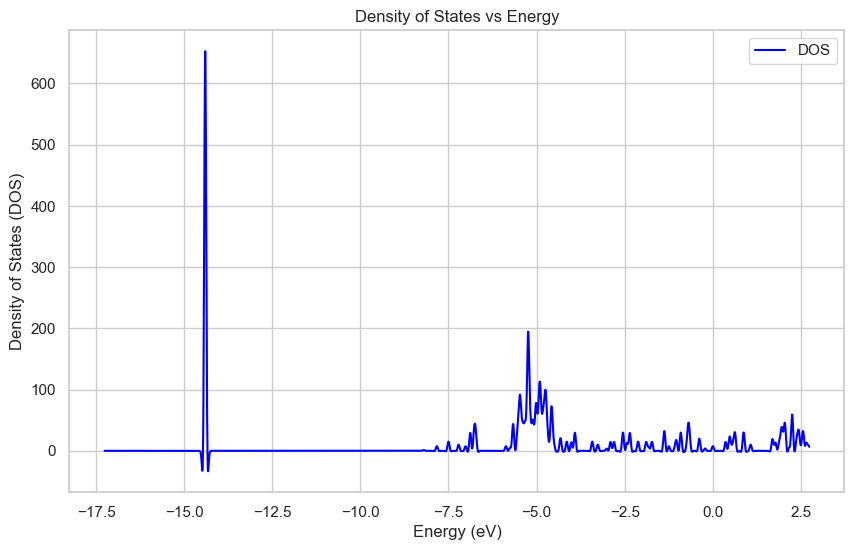

In [37]:
# Plot the DOS of the YInAg2 material
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.plot(data["Energy"], data["DOS"], color="blue", label="DOS")
plt.xlabel("Energy (eV)")
plt.ylabel("Density of States (DOS)")
plt.title("Density of States vs Energy")
plt.legend()
plt.show()

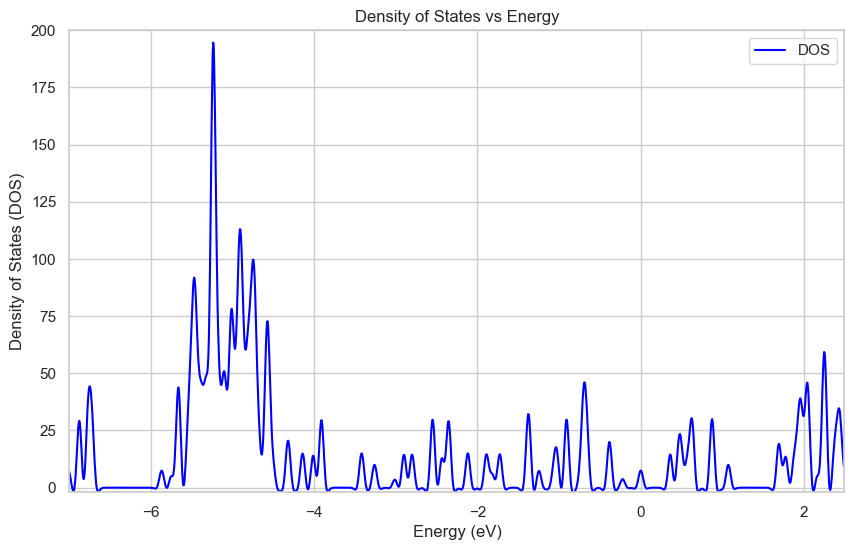

In [38]:
# Customizing the DOS plot in x(Energy) and y(DOS)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.plot(data["Energy"], data["DOS"], color="blue", label="DOS")
plt.xlabel("Energy (eV)")
plt.ylabel("Density of States (DOS)")
plt.title("Density of States vs Energy")
plt.legend()
plt.xlim(-7.0, 2.5)  # X-axis range
plt.ylim(-2, 200)     # Y-axis range
plt.show()

In [39]:
# We can see that the at zero point (At fermi lever state) of x-axis the have some of participant of the DOS. So this is a metallic metal

In [40]:
# Identify key features
print("Basic Statistics for DOS:")
print(data["DOS"].describe())

Basic Statistics for DOS:
count    2999.000000
mean        9.030069
std        36.623352
min       -33.390000
25%         0.000000
50%         0.000000
75%         5.238500
max       652.600000
Name: DOS, dtype: float64


In [41]:
# Find peaks (approximation by threshold)
peak_threshold = 0.1 * data["DOS"].max()
peaks = data[data["DOS"] > peak_threshold]
print("\nApproximate Energy Levels of Peaks:")
print(peaks)


Approximate Energy Levels of Peaks:
        Energy     DOS
420  -14.45364   72.88
421  -14.44764  141.00
422  -14.44064  226.00
423  -14.43364  322.70
424  -14.42764  423.00
...        ...     ...
1881  -4.71064   68.41
1900  -4.58364   69.21
1901  -4.57764   72.51
1902  -4.57064   72.80
1903  -4.56364   70.11

[89 rows x 2 columns]


In [42]:
# Calculate the total DOS using np.trapezoid
total_dos = np.trapezoid(data["DOS"], data["Energy"])
print(f"\nTotal Density of States (area under curve): {total_dos:.3f}")



Total Density of States (area under curve): 180.589


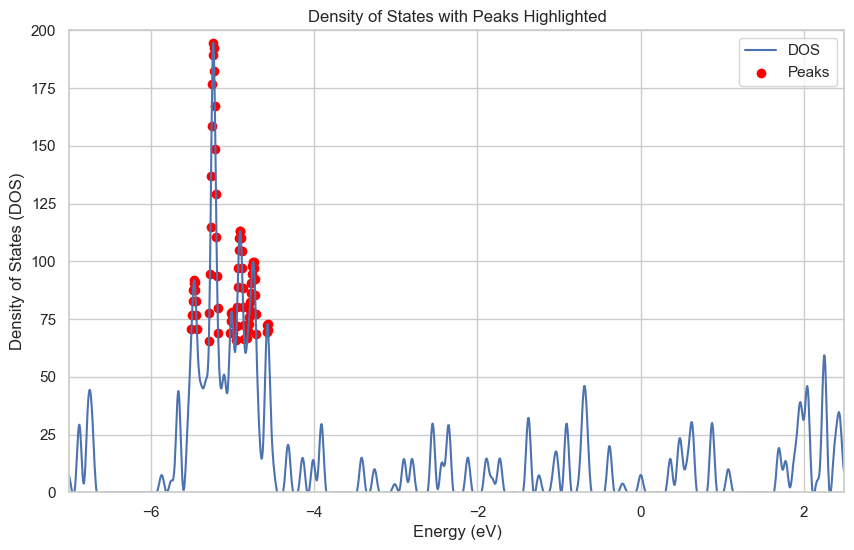

In [43]:
# Optional: Highlight Peaks in the Plot
plt.figure(figsize=(10, 6))
plt.plot(data["Energy"], data["DOS"], label="DOS")
plt.scatter(peaks["Energy"], peaks["DOS"], color="red", label="Peaks")
plt.xlabel("Energy (eV)")
plt.ylabel("Density of States (DOS)")
plt.title("Density of States with Peaks Highlighted")
plt.xlim(-7, 2.5)  # X-axis range
plt.ylim(0, 200)     # Y-axis range
plt.legend()
plt.show()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
filepath = r"D:\Python Projects\PHDOS.csv"
data=pd.read_csv(filepath)

In [5]:
data.describe()

,Energy,Total,PDOS-Lu,PDOS-Pd,PDOS-B
count,2000.000000,2000.000000,2.000000e+03,2000.000000,2000.000000
mean,7.783516,0.053119,1.062371e-02,0.031871,0.010624
std,5.435904,0.128044,3.082635e-02,0.100056,0.040602
min,-1.624687,0.000000,0.000000e+00,0.000000,0.000000
25%,3.079414,0.000000,0.000000e+00,0.000000,0.000000
50%,7.783516,0.000000,0.000000e+00,0.000000,0.000000
75%,12.487618,0.022613,1.470000e-07,0.005187,0.000200
max,17.191719,0.939218,1.424921e-01,0.847997,0.252915


In [6]:
data.tail(900)

,Energy,Total,PDOS-Lu,PDOS-Pd,PDOS-B
1100,8.729513,0.0,0.0,0.0,0.0
1101,8.738926,0.0,0.0,0.0,0.0
1102,8.748339,0.0,0.0,0.0,0.0
1103,8.757752,0.0,0.0,0.0,0.0
1104,8.767165,0.0,0.0,0.0,0.0
...,...,...,...,...,...
1995,17.154068,0.0,0.0,0.0,0.0
1996,17.163480,0.0,0.0,0.0,0.0
1997,17.172893,0.0,0.0,0.0,0.0
1998,17.182306,0.0,0.0,0.0,0.0


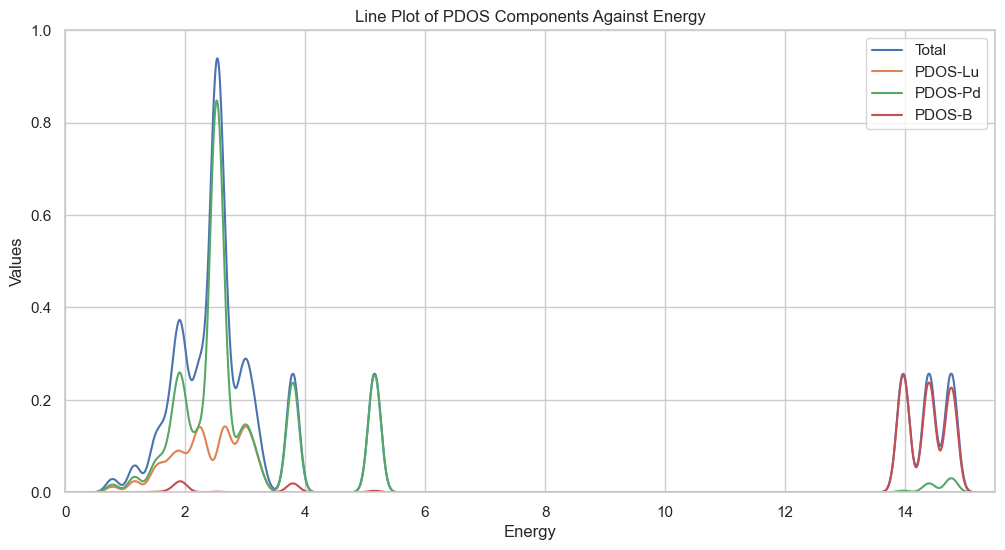

In [7]:
#Line plot for Phonon DOS of numerical column
# Set a style for the plots
sns.set(style="whitegrid")

# 1. Line plot for all columns against Energy
plt.figure(figsize=(12, 6))
for column in data.columns[1:]:
    plt.plot(data['Energy'], data[column], label=column)
plt.title("Line Plot of PDOS Components Against Energy")
plt.xlabel("Energy")
plt.ylabel("Values")
# Define the range for x-axis and y-axis
xrange = (0, 15.5)  # Set your desired x-axis range
yrange = (0, 1.0) # set y-axis range
plt.xlim(xrange)
plt.ylim(yrange)
plt.legend()
plt.show()

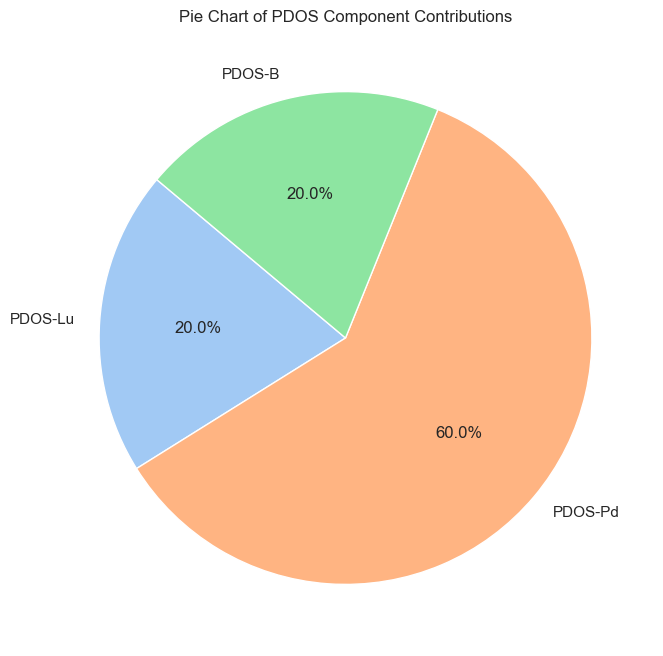

In [8]:
# Aggregate the total contributions of each PDOS component
columns = ['PDOS-Lu', 'PDOS-Pd', 'PDOS-B']
component_sums = data[columns].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    component_sums, 
    labels=columns, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette("pastel")
)
plt.title("Pie Chart of PDOS Component Contributions")
plt.show()